In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data = pd.read_csv("drive/My Drive/main_issue_data.csv")

In [4]:
data.head()

,para,persons covered treaty eligibility,pe,business profits,shipping air transport,interest,royalty,royaltyfts,fts,independent personal services,dividend,capital gains,other treaty issues,gaar,income not includible in total income,profits gains from business profession,other sources,unexplained income,chapter via deductions,minimum alternate tax,prosecution,interest (interest on income tax refund),carry forward of losses,penalty,dispute resolution,section 9,refund processing section 143(1d),dividend distribution tax
0,2 the contention of the company was that this ...,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,6 the questions referred to us by the board fo...,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,8 as regards the applicability of section 8 of...,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,11 under the former incometax act no ii of 188...,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,12 at the request of messrs a john and co mana...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
data.tail()

,para,persons covered treaty eligibility,pe,business profits,shipping air transport,interest,royalty,royaltyfts,fts,independent personal services,dividend,capital gains,other treaty issues,gaar,income not includible in total income,profits gains from business profession,other sources,unexplained income,chapter via deductions,minimum alternate tax,prosecution,interest (interest on income tax refund),carry forward of losses,penalty,dispute resolution,section 9,refund processing section 143(1d),dividend distribution tax
188396,after a discussion of the matter the court int...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
188397,thereafter the court on further discussion hel...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
188398,30 now we may pass on to the consideration of ...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
188399,34 there remains the argument of mr pulak raj ...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
188400,14 commissioner (appeals) is separately define...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188401 entries, 0 to 188400
Data columns (total 28 columns):
para                                        188401 non-null object
persons covered treaty eligibility          188401 non-null int64
pe                                          188401 non-null int64
business profits                            188401 non-null int64
shipping air transport                      188401 non-null int64
interest                                    188401 non-null int64
royalty                                     188401 non-null int64
royaltyfts                                  188401 non-null int64
fts                                         188401 non-null int64
independent personal services               188401 non-null int64
dividend                                    188401 non-null int64
capital gains                               188401 non-null int64
other treaty issues                         188401 non-null int64
gaar                          

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train, val = train_test_split(data,test_size=0.2,random_state=123)
train, test = train_test_split(train,test_size=0.18,random_state=123)

In [10]:
print(train.shape)
print(val.shape)
print(test.shape)

(123590, 28)
(37681, 28)
(27130, 28)


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Model, load_model 
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout, Conv1D,Dense, Embedding, Input, GRU, GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
from sklearn import metrics
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [0]:
# F1 Score
def f1_score(y_true, y_pred):
	"""
	Compute the micro f(b) score with b=1.
	"""
	y_true = tf.cast(y_true, "float32")
	y_pred = tf.cast(tf.round(y_pred), "float32")
	y_correct = y_true * y_pred


	sum_true = tf.reduce_sum(y_true, axis=1)
	sum_pred = tf.reduce_sum(y_pred, axis=1)
	sum_correct = tf.reduce_sum(y_correct, axis=1)


	precision = sum_correct / sum_pred
	recall = sum_correct / sum_true
	f_score = 2 * precision * recall / (precision + recall)
	f_score = tf.where(tf.is_nan(f_score), tf.zeros_like(f_score), f_score)


	return tf.reduce_mean(f_score)

In [0]:
features_train = train["para"]
features_valid = val["para"]
features_test = test["para"]

In [0]:
y_train = train.iloc[:,1:]
y_test = test.iloc[:,1:]
y_valid = val.iloc[:,1:]

In [19]:
!wget http://nlp.stanford.edu/data/glove.840B.300d.zip

--2019-12-16 06:14:14--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2019-12-16 06:14:15--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2019-12-16 06:14:15--  http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip

In [0]:
import zipfile
zip_ref = zipfile.ZipFile("glove.840B.300d.zip", 'r')
zip_ref.extractall("glove")
zip_ref.close()

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [23]:
weights_file = drive.CreateFile({'title' : 'glove/glove.840B.300d.txt'})
weights_file.SetContentFile('glove/glove.840B.300d.txt')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1W5Gwr6GFtV2-78vCjz0qROx1IfSJZRcE'})

In [0]:
max_features = 80000
EMBEDDING_DIM = 300

In [0]:
# convert the sentences (strings) into integers
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(features_train)
sequences_train = tokenizer.texts_to_sequences(features_train)
sequences_test = tokenizer.texts_to_sequences(features_test)

In [0]:
sequences_valid = tokenizer.texts_to_sequences(features_valid)

In [28]:
# get word -> integer mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 767221 unique tokens.


In [0]:
length = []

for i in sequences_train:

  length.append(len(i))

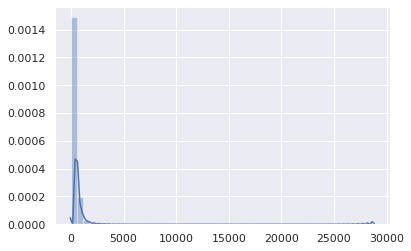

In [30]:
sns.set()
sns.distplot(length)

In [31]:
MAX_SEQUENCE_LENGTH = 500
encoded_train = pad_sequences(sequences_train,maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', encoded_train.shape)
encoded_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', encoded_test.shape)
encoded_valid = pad_sequences(sequences_valid, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', encoded_valid.shape)

Shape of data tensor: (123590, 500)
Shape of data tensor: (27130, 500)
Shape of data tensor: (37681, 500)


In [0]:
EMBEDDING_FILE = 'glove/glove.840B.300d.txt'
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [34]:
print(embedding_matrix.shape)

(80000, 300)


In [35]:
y_train.shape

(123590, 27)

In [0]:
embedding_layer = Embedding(
  nb_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)
print('Building model...')

input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_)
x = Bidirectional(GRU(128, return_sequences=True, dropout=0.1,
                                                      recurrent_dropout=0.1))(x)
 
x = Conv1D(64, kernel_size=3, padding="valid", kernel_initializer="glorot_uniform")(x)
 
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
 
x = concatenate([avg_pool, max_pool])
 
preds = Dense(27, activation="sigmoid")(x)
 
model = Model(input_, preds)
 

 
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-3), metrics=[f1_score])

In [0]:
# Callbacks
model_3 = ModelCheckpoint('model_bilstm_multilabel_2.h5', save_best_only=True, monitor='val_loss', mode='min')
logdir = "logs/model_bilstm_multilabel/"
tensorboard_callback = TensorBoard(log_dir=logdir)

In [39]:
print('Training model...')
r = model.fit(
  encoded_train,
  y_train,
  batch_size=512,
  epochs=10,
  validation_data=(encoded_valid,y_valid),callbacks=[tensorboard_callback,model_3]
)

Training model...


Train on 123590 samples, validate on 37681 samples


Epoch 1/10
123590/123590 [==============================] - 357s 3ms/step - loss: 0.2545 - f1_score: 0.1653 - val_loss: 0.1790 - val_f1_score: 0.3666

Epoch 2/10
123590/123590 [==============================] - 356s 3ms/step - loss: 0.1570 - f1_score: 0.4613 - val_loss: 0.1405 - val_f1_score: 0.5422
Epoch 3/10
123590/123590 [==============================] - 343s 3ms/step - loss: 0.1326 - f1_score: 0.5707 - val_loss: 0.1251 - val_f1_score: 0.6094
Epoch 4/10
123590/123590 [==============================] - 347s 3ms/step - loss: 0.1203 - f1_score: 0.6260 - val_loss: 0.1167 - val_f1_score: 0.6470
Epoch 5/10
123590/123590 [==============================] - 353s 3ms/step - loss: 0.1117 - f1_score: 0.6602 - val_loss: 0.1103 - val_f1_score: 0.6861
Epoch 6/10
123590/123590 [==============================] - 353s 3ms/step - loss: 0.1062 - f1_score: 0.6825 - val_loss: 0.1073 - val_f1_score: 0.6887
Epoch 7/10
123590/123590 [

In [40]:
result = model.evaluate(encoded_test,y_test,batch_size=512)
print(result)

27130/27130 [==============================] - 28s 1ms/step
[0.09705059953964904, 0.7307835180909705]


In [0]:
%load_ext tensorboard

In [42]:
%tensorboard --logdir logs

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [46]:
weights_file = drive.CreateFile({'title' : 'model_bilstm_multilabel_2.h5'})
weights_file.SetContentFile('model_bilstm_multilabel_2.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1sta3WeS7GENP77Rbbgl5b2gLEfM_grF0'})

In [0]:

# serialize model to JSON
model_ = model.to_json()
with open("model_.json", "w") as json_file:
    json_file.write(model_)

In [0]:
predictions = model.predict(encoded_test,batch_size=512)

In [50]:
for thresh in np.arange(0.5, 0.701, 0.01):
    thresh = np.round(thresh, 2)
    print("Precision score at threshold {0} is {1}".format(thresh, metrics.precision_score(y_test, (predictions>thresh).astype(int),average="micro")))

Precision score at threshold 0.5 is 0.9134619322603105
Precision score at threshold 0.51 is 0.9161846931626163
Precision score at threshold 0.52 is 0.9188583755081723
Precision score at threshold 0.53 is 0.9216316646486576
Precision score at threshold 0.54 is 0.9239979833627426
Precision score at threshold 0.55 is 0.9266351058133965
Precision score at threshold 0.56 is 0.9288446824789595
Precision score at threshold 0.57 is 0.9310934671361167
Precision score at threshold 0.58 is 0.9331766189834589
Precision score at threshold 0.59 is 0.9353950403690888
Precision score at threshold 0.6 is 0.9371928858223775
Precision score at threshold 0.61 is 0.9396193393130606
Precision score at threshold 0.62 is 0.9417873014476174
Precision score at threshold 0.63 is 0.9439110363848208
Precision score at threshold 0.64 is 0.9456790855584054
Precision score at threshold 0.65 is 0.9473660674358286
Precision score at threshold 0.66 is 0.9490496462405564
Precision score at threshold 0.67 is 0.95072651633

In [51]:
for thresh in np.arange(0.5, 0.701, 0.01):
    thresh = np.round(thresh, 2)
    print("Recall score at threshold {0} is {1}".format(thresh, metrics.recall_score(y_test, (predictions>thresh).astype(int),average="micro")))

Recall score at threshold 0.5 is 0.7870703648810784
Recall score at threshold 0.51 is 0.7844590302773661
Recall score at threshold 0.52 is 0.7816359658409203
Recall score at threshold 0.53 is 0.7789540546262969
Recall score at threshold 0.54 is 0.7760957018843955
Recall score at threshold 0.55 is 0.7736019949655351
Recall score at threshold 0.56 is 0.7711200508151599
Recall score at threshold 0.57 is 0.7683322746841696
Recall score at threshold 0.58 is 0.7658032794598537
Recall score at threshold 0.59 is 0.7631566565506858
Recall score at threshold 0.6 is 0.7605335591784882
Recall score at threshold 0.61 is 0.7578163596584092
Recall score at threshold 0.62 is 0.7553108899710635
Recall score at threshold 0.63 is 0.7528171830522031
Recall score at threshold 0.64 is 0.7503117133648576
Recall score at threshold 0.65 is 0.7475827510762934
Recall score at threshold 0.66 is 0.7447361611028772
Recall score at threshold 0.67 is 0.7419366222034018
Recall score at threshold 0.68 is 0.739278236525

In [52]:
for thresh in np.arange(0.5, 0.701, 0.01):
    thresh = np.round(thresh, 2)
    print("F1 score at threshold {0} is {1}".format(thresh, metrics.f1_score(y_test, (predictions>thresh).astype(int),average="micro")))

F1 score at threshold 0.5 is 0.8455691403658422
F1 score at threshold 0.51 is 0.8452203669085263
F1 score at threshold 0.52 is 0.844710548394478
F1 score at threshold 0.53 is 0.8443075981564
F1 score at threshold 0.54 is 0.8436133486766398
F1 score at threshold 0.55 is 0.8432315306305613
F1 score at threshold 0.56 is 0.8426654326700602
F1 score at threshold 0.57 is 0.8419187069415534
F1 score at threshold 0.58 is 0.8412456389714434
F1 score at threshold 0.59 is 0.8405430966354438
F1 score at threshold 0.6 is 0.8396719544424458
F1 score at threshold 0.61 is 0.8389818920555545
F1 score at threshold 0.62 is 0.8383041221971995
F1 score at threshold 0.63 is 0.8376031462468181
F1 score at threshold 0.64 is 0.8367428590168235
F1 score at threshold 0.65 is 0.8357001972386587
F1 score at threshold 0.66 is 0.8345702120928518
F1 score at threshold 0.67 is 0.8334544589648384
F1 score at threshold 0.68 is 0.8323984980828704
F1 score at threshold 0.69 is 0.8313307399195422
F1 score at threshold 0.7 